In [1]:
from plotnine.data import mtcars
from plotnine import ggplot, aes, geom_point, labs, theme_bw, facet_wrap, geom_smooth

# give transmission_type a human readable name rather than 0 or 1
mtcars['transmission_type'] = mtcars['am']\
    .apply(lambda x: {0: 'automatic', 
                      1: 'manual'}[x])

mtcars.rename(columns={'gear': 'number_gears', 'cyl': 'number_cylinders'}, inplace=True)
  
# Extract `brand` from name
mtcars['brand'] = mtcars['name'].str.split(expand=True)[0]
mtcars = mtcars.drop('am',axis='columns')
# Display the dataset
mtcars.head()

,name,mpg,number_cylinders,disp,hp,drat,wt,qsec,vs,number_gears,carb,transmission_type,brand
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,4,4,manual,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,4,4,manual,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,4,1,manual,Datsun
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,3,1,automatic,Hornet
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,3,2,automatic,Hornet


In [208]:
avg =mtcars[mtcars.transmission_type=='manual']
avg.mpg.mean()

24.39230769230769

In [203]:
avg_2 =mtcars[mtcars.transmission_type=='automatic']
avg_2.mpg.mean()

17.147368421052633

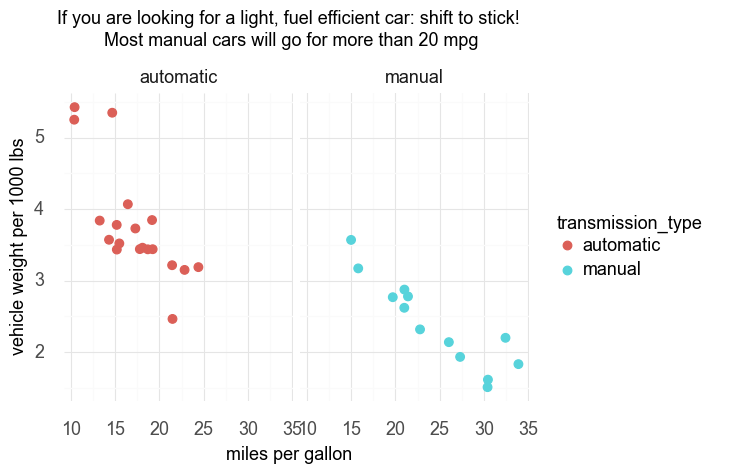

<ggplot: (312129945)>

In [218]:
from plotnine import *
display(
    ggplot(mtcars,             
        aes('mpg', 'wt', color='transmission_type'))
        + geom_jitter(size=3)  
        + theme_minimal()
        + theme(text=element_text(family="arial", size=13, linespacing=1.3))
        + theme(figure_size=(6, 4))
        + facet_wrap('~transmission_type')
        + labs(
            title = "If you are looking for a light, fuel efficient car: shift to stick!\n Most manual cars will go for more than 20 mpg",
            y = "vehicle weight per 1000 lbs",
            x = "miles per gallon",
            caption ="Based on a cars dataset from Motor Trend US magazine"
        )
) 

In [64]:
efficient_cars =mtcars[(mtcars.mpg >25)]

In [65]:
efficient_cars

,name,mpg,number_cylinders,disp,hp,drat,wt,qsec,vs,number_gears,carb,transmission_type,brand
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,4,1,manual,Fiat
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,4,2,manual,Honda
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,4,1,manual,Toyota
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,4,1,manual,Fiat
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,5,2,manual,Porsche
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,5,2,manual,Lotus


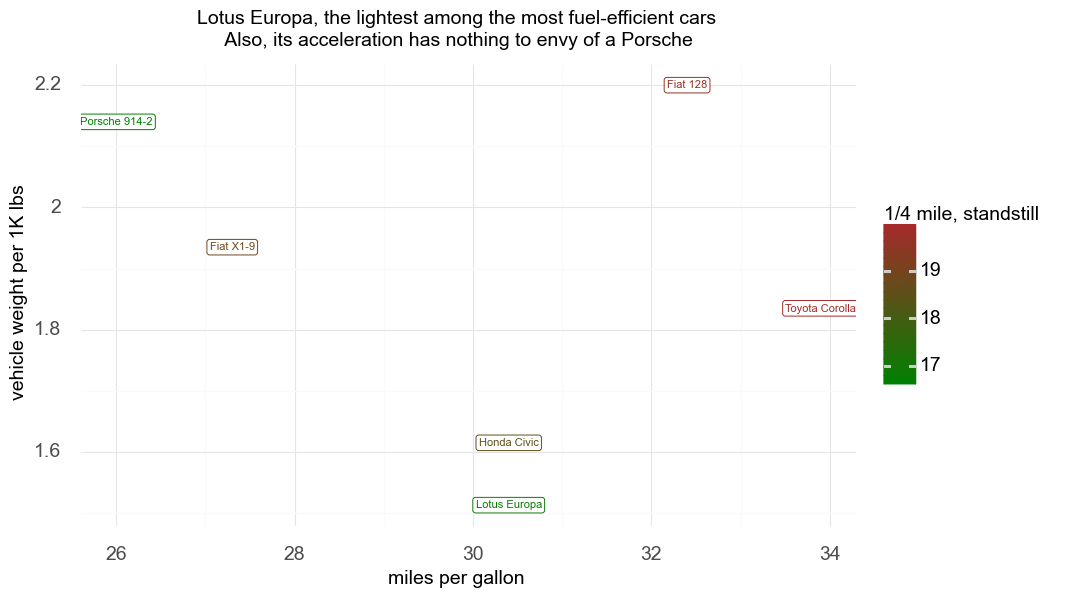

<ggplot: (311732891)>

In [217]:
from plotnine import *
display(
    ggplot(efficient_cars,             
        aes('mpg', 'wt', color='qsec', label='name'))
        + scale_color_gradient(low='green', high='brown')
        + geom_label(size=8, ha = 'center')  
        + theme_minimal()
        + theme(text=element_text(family="arial", size=14, linespacing=1.3))
        + theme(figure_size=(10, 6))
        + labs(colour='1/4 mile, standstill')
        + labs(
            title = "Lotus Europa, the lightest among the most fuel-efficient cars\n Also, its acceleration has nothing to envy of a Porsche",
            y = "vehicle weight per 1K lbs",
            x = "miles per gallon",
            caption ="Based on a cars dataset from Motor Trend US magazine"
        )
) 